In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

folder_data = '../data'

files = os.listdir(folder_data)

df_cha = pd.read_csv(f'{folder_data}/{files[0]}',encoding='ISO-8859-1')
print(files[0])
df_del = pd.read_csv(f'{folder_data}/{files[1]}',encoding='ISO-8859-1')
print(files[1])
df_dri = pd.read_csv(f'{folder_data}/{files[2]}',encoding='ISO-8859-1')
print(files[2])
df_hub = pd.read_csv(f'{folder_data}/{files[3]}',encoding='ISO-8859-1')
print(files[3])
df_ord = pd.read_csv(f'{folder_data}/{files[4]}',encoding='ISO-8859-1')
print(files[4])
df_pay = pd.read_csv(f'{folder_data}/{files[5]}',encoding='ISO-8859-1')
print(files[5])
df_sto = pd.read_csv(f'{folder_data}/{files[6]}',encoding='ISO-8859-1')
print(files[6])


channels.csv
deliveries.csv
drives.csv
hubs.csv
orders.csv
payments.csv
stores.csv


- Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação 
para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar 
de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover (moto, bike, etc).
 Levante essas informações.

quantas modalidades existem:

In [7]:
df_dri.driver_modal.unique()

array(['MOTOBOY', 'BIKER'], dtype=object)

In [20]:
df_dri.driver_modal.value_counts()

driver_modal
MOTOBOY    3222
BIKER      1602
Name: count, dtype: int64

In [13]:
df_dri.driver_type.unique()

array(['LOGISTIC OPERATOR', 'FREELANCE'], dtype=object)

In [21]:
df_dri.driver_type.value_counts()

driver_type
FREELANCE            3939
LOGISTIC OPERATOR     885
Name: count, dtype: int64

In [24]:
df_del.delivery_status.value_counts()

delivery_status
DELIVERED     371367
CANCELLED       7253
DELIVERING       223
Name: count, dtype: int64

In [94]:
df_delivered = df_del[df_del['delivery_status'] == 'DELIVERED']
df_delivered_nona = df_delivered.dropna()
df_delivered_isna = df_delivered[df_delivered['driver_id'].isna()]

In [96]:
df_delivered.loc[:,'isnull_or_notnull'] = df_delivered['driver_id'].apply(lambda x: 'isnull' if pd.isnull(x) else 'notnull')

In [98]:
df_delivered.isnull_or_notnull.value_counts()

isnull_or_notnull
notnull    362766
isnull       8601
Name: count, dtype: int64

In [ ]:
df_delivered.delivery_distance_meters

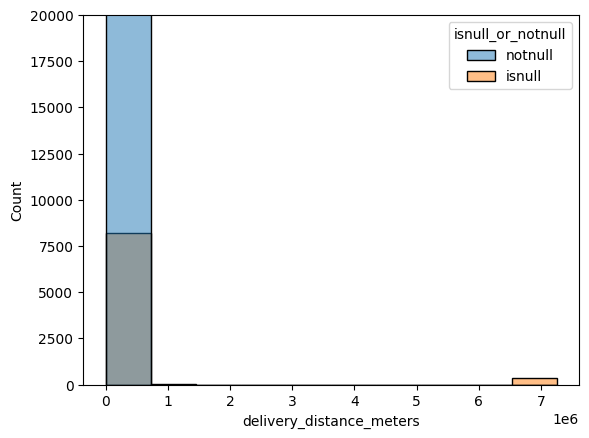

In [112]:
sns.histplot(df_delivered,x='delivery_distance_meters', hue='isnull_or_notnull',bins=10)
plt.ylim(0,20000)
plt.show()

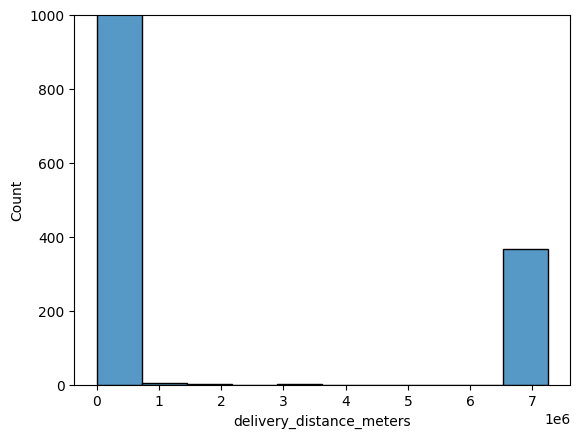

In [121]:
sns.histplot(df_delivered_isna,x='delivery_distance_meters',bins=10)
plt.ylim(0,1000)
plt.show()

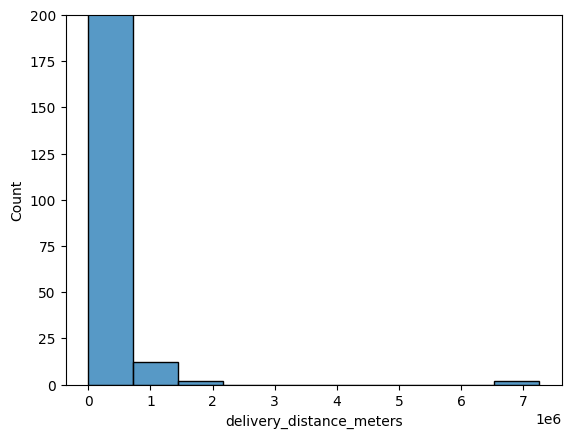

In [119]:
sns.histplot(df_delivered_nona,x='delivery_distance_meters',bins=10)
plt.ylim(0,200)
plt.show()

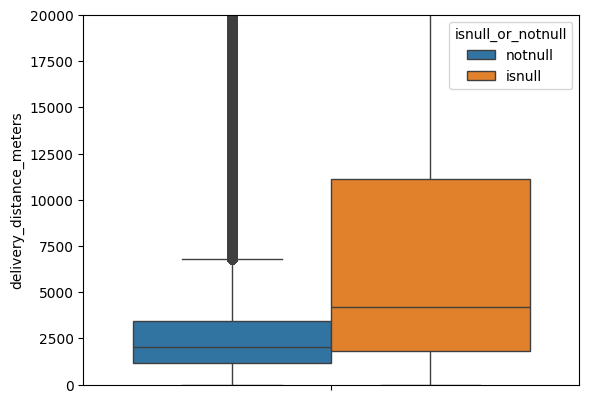

In [125]:
sns.boxplot(df_delivered, hue='isnull_or_notnull', y='delivery_distance_meters')
plt.ylim(0,20000)
plt.show()

In [126]:
Q1 = df_delivered['delivery_distance_meters'].quantile(0.25)
Q3 = df_delivered['delivery_distance_meters'].quantile(0.75)

Q1isna = df_delivered_isna['delivery_distance_meters'].quantile(0.25)
Q3isna = df_delivered_isna['delivery_distance_meters'].quantile(0.75)

Q1nona = df_delivered_nona['delivery_distance_meters'].quantile(0.25)
Q3nona = df_delivered_nona['delivery_distance_meters'].quantile(0.75)

IQR = Q3 - Q1
IQRisna = Q3isna - Q1isna
IQRnona = Q3nona - Q1nona

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_delivered[(df_delivered['delivery_distance_meters'] <= upper_bound)]

lower_bound = Q1isna - 1.5 * IQRisna
upper_bound = Q3isna + 1.5 * IQRisna
df_no_outliers_isna = df_delivered_isna[(df_delivered_isna['delivery_distance_meters'] <= upper_bound)]

lower_bound = Q1nona - 1.5 * IQRnona
upper_bound = Q3nona + 1.5 * IQRnona
df_no_outliers_nona = df_delivered_nona[(df_delivered_nona['delivery_distance_meters'] <= upper_bound)]


<Axes: ylabel='delivery_distance_meters'>

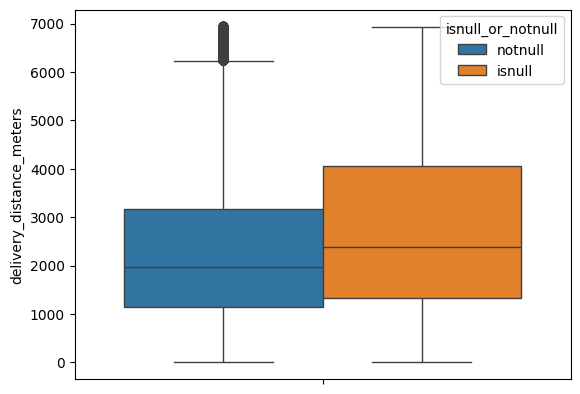

In [127]:
sns.boxplot(df_no_outliers, hue='isnull_or_notnull', y='delivery_distance_meters')

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

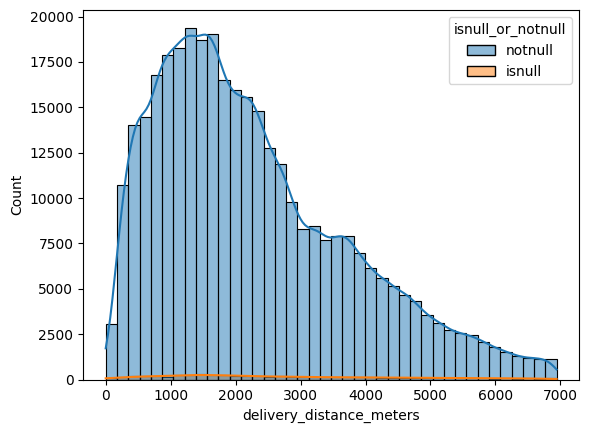

In [134]:
sns.histplot(df_no_outliers,x='delivery_distance_meters',bins=40,kde=True, hue='isnull_or_notnull')

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

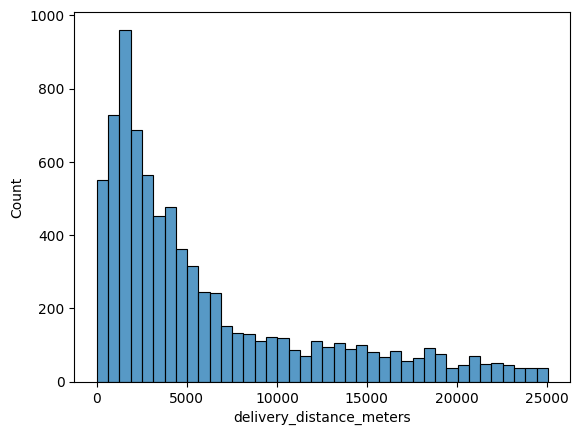

In [130]:
sns.histplot(df_no_outliers_isna,x='delivery_distance_meters',bins=40)

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

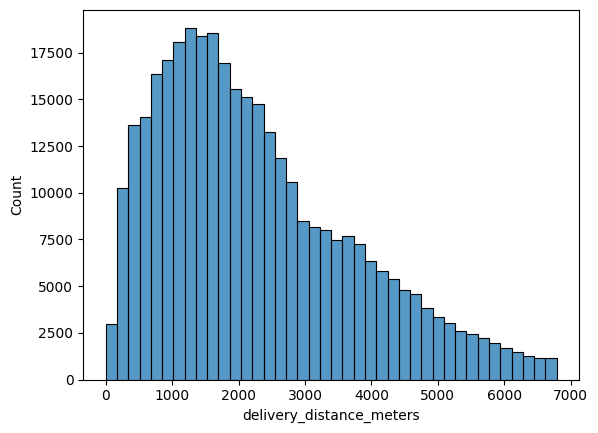

In [131]:
sns.histplot(df_no_outliers_nona,x='delivery_distance_meters',bins=40)

Como podemos notar grande parte das possíveis fraudes estão em usuários nulos. Para esta tarefa é recomendado remover usuarios nulos, pois sem identicação é impossivel contacta-los para anunciar que ganharam.

In [136]:
df_dri.columns

Index(['driver_id', 'driver_modal', 'driver_type'], dtype='object')

In [138]:
df_merged = df_no_outliers_nona.join(df_dri[['driver_modal', 'driver_type']],on='driver_id')

In [141]:
df_merged

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type
0,2174658,68413340,8378.0,5199.0,DELIVERED,NaN,NaN
1,2174660,68414309,2473.0,410.0,DELIVERED,BIKER,FREELANCE
2,2174661,68416230,7615.0,3784.0,DELIVERED,NaN,NaN
3,2174663,68412721,8378.0,5714.0,DELIVERED,NaN,NaN
4,2174675,68414018,10463.0,3746.0,DELIVERED,NaN,NaN
...,...,...,...,...,...,...,...
378836,3128338,93125719,24358.0,3667.0,DELIVERED,NaN,NaN
378837,3130930,93111400,22345.0,3414.0,DELIVERED,NaN,NaN
378840,3135849,82340127,55429.0,2546.0,DELIVERED,NaN,NaN
378841,3142829,88586792,47016.0,3106.0,DELIVERED,NaN,NaN


In [159]:
df_merged_nona = df_no_outliers_nona.join(df_dri[['driver_modal', 'driver_type']],on='driver_id', how='inner')

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

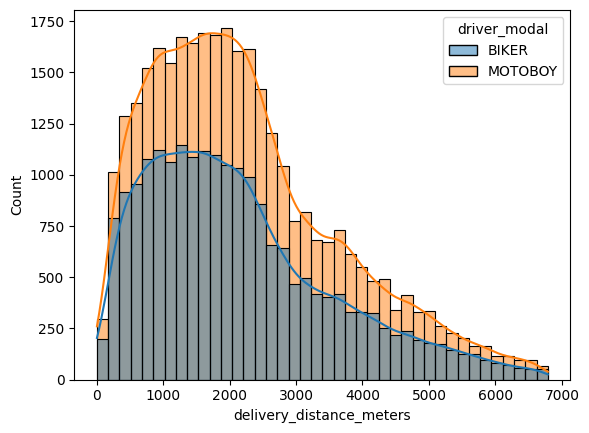

In [160]:
sns.histplot(df_merged_nona,x='delivery_distance_meters',bins=40, kde=True, hue= 'driver_modal')

In [161]:
# Replace NaN values with 'null' string
df_merged.fillna('null', inplace=True)

<Axes: ylabel='delivery_distance_meters'>

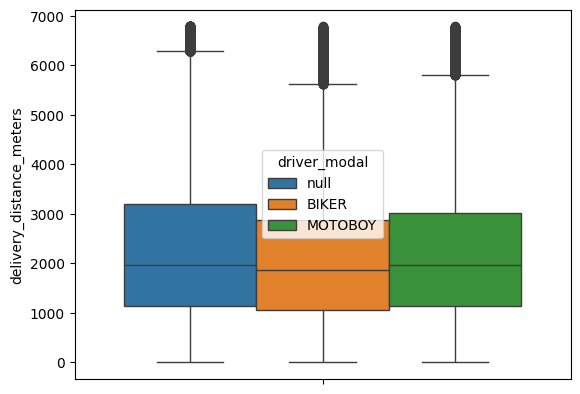

In [163]:
sns.boxplot(df_merged, y='delivery_distance_meters' ,hue = 'driver_modal')

<Axes: ylabel='delivery_distance_meters'>

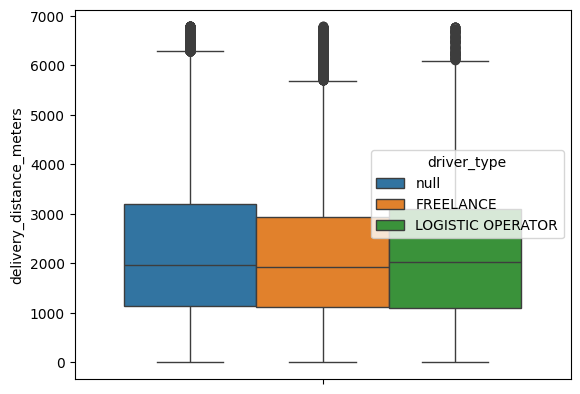

In [164]:
sns.boxplot(df_merged, y='delivery_distance_meters' ,hue = 'driver_type')

(0.0, 3000.0)

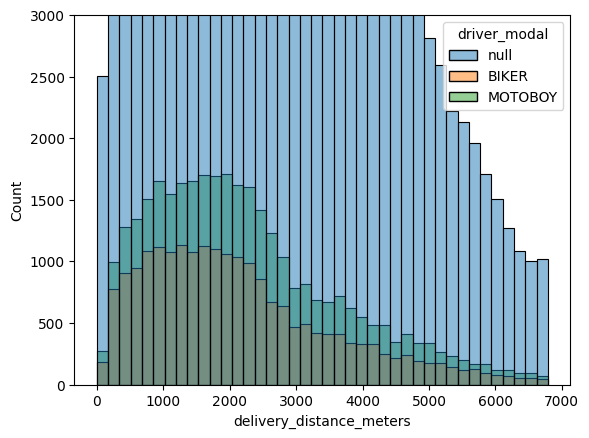

In [169]:
sns.histplot(df_merged, x='delivery_distance_meters', hue='driver_modal', bins=40)
plt.ylim(0,3000)

(0.0, 4000.0)

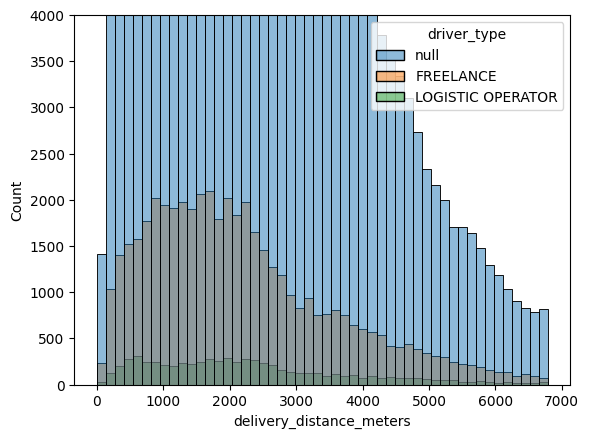

In [168]:
sns.histplot(df_merged, x='delivery_distance_meters', hue='driver_type', bins=50)
plt.ylim(0,4000)

In [183]:
df_merged_nona[['driver_id','delivery_distance_meters']]\
    .groupby('driver_id').sum()\
        .sort_values('delivery_distance_meters',ascending=False)\
            .join(df_merged_nona[['driver_modal','driver_type']],on='driver_id', how="inner").head(20)

,delivery_distance_meters,driver_modal,driver_type
driver_id,,,
526.0,1338537.0,MOTOBOY,FREELANCE
366.0,1174371.0,MOTOBOY,FREELANCE
2750.0,1070187.0,MOTOBOY,FREELANCE
1040.0,882976.0,MOTOBOY,FREELANCE
759.0,879316.0,MOTOBOY,FREELANCE
1419.0,845974.0,MOTOBOY,FREELANCE
1032.0,797778.0,MOTOBOY,LOGISTIC OPERATOR
313.0,740847.0,BIKER,FREELANCE
4532.0,727325.0,MOTOBOY,FREELANCE


In [187]:
2/(18+2)

0.1

In [185]:
df_merged_nona['driver_type'].value_counts()

driver_type
FREELANCE            47072
LOGISTIC OPERATOR     6637
Name: count, dtype: int64

In [186]:
6637/(47072+6637)

0.12357333035431678

In [188]:
df_merged_nona['driver_modal'].value_counts()

driver_modal
MOTOBOY    32680
BIKER      21029
Name: count, dtype: int64

In [190]:
7/(13+7)

0.35

In [189]:
21029/(32680+21029)

0.39153586922117334